In [1]:
from dredFISH.Registration.Registration import *
download_base = '/orangedata/ExternalData/Allen_WMB_2024Mar06'
reference_data = torch.load(os.path.join(download_base,'minimal_spatial_data.pt'))
reference_data = pd.DataFrame(reference_data.numpy(),columns=['ccf_x','ccf_y','ccf_z','cluster_alias'])
reference_data['cluster_alias'] = reference_data['cluster_alias'].astype(int)
negative_reference_data = reference_data.copy()
negative_reference_data['ccf_z'] = -negative_reference_data['ccf_z']
reference_data = pd.concat([reference_data,negative_reference_data],ignore_index=True)

pivot_table = pd.read_csv(os.path.join(download_base,'pivot_table.csv'))

colormap = dict(zip(pivot_table['cluster_alias'],pivot_table['subclass_color']))
reference_data['color'] = reference_data['cluster_alias'].map(colormap)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
reference_data.head()

ccf_x     ccf_y     ccf_z  cluster_alias    color
0   7.495417  2.445872  1.743854           1408  #3D53CC
1   9.227966  6.133693  0.486187           4218  #9B7ACC
2   9.344912  6.989939  0.291452           4218  #9B7ACC
3  10.977068  4.398568  2.405989           4218  #9B7ACC
4   8.997138  6.798329  0.115985           4218  #9B7ACC

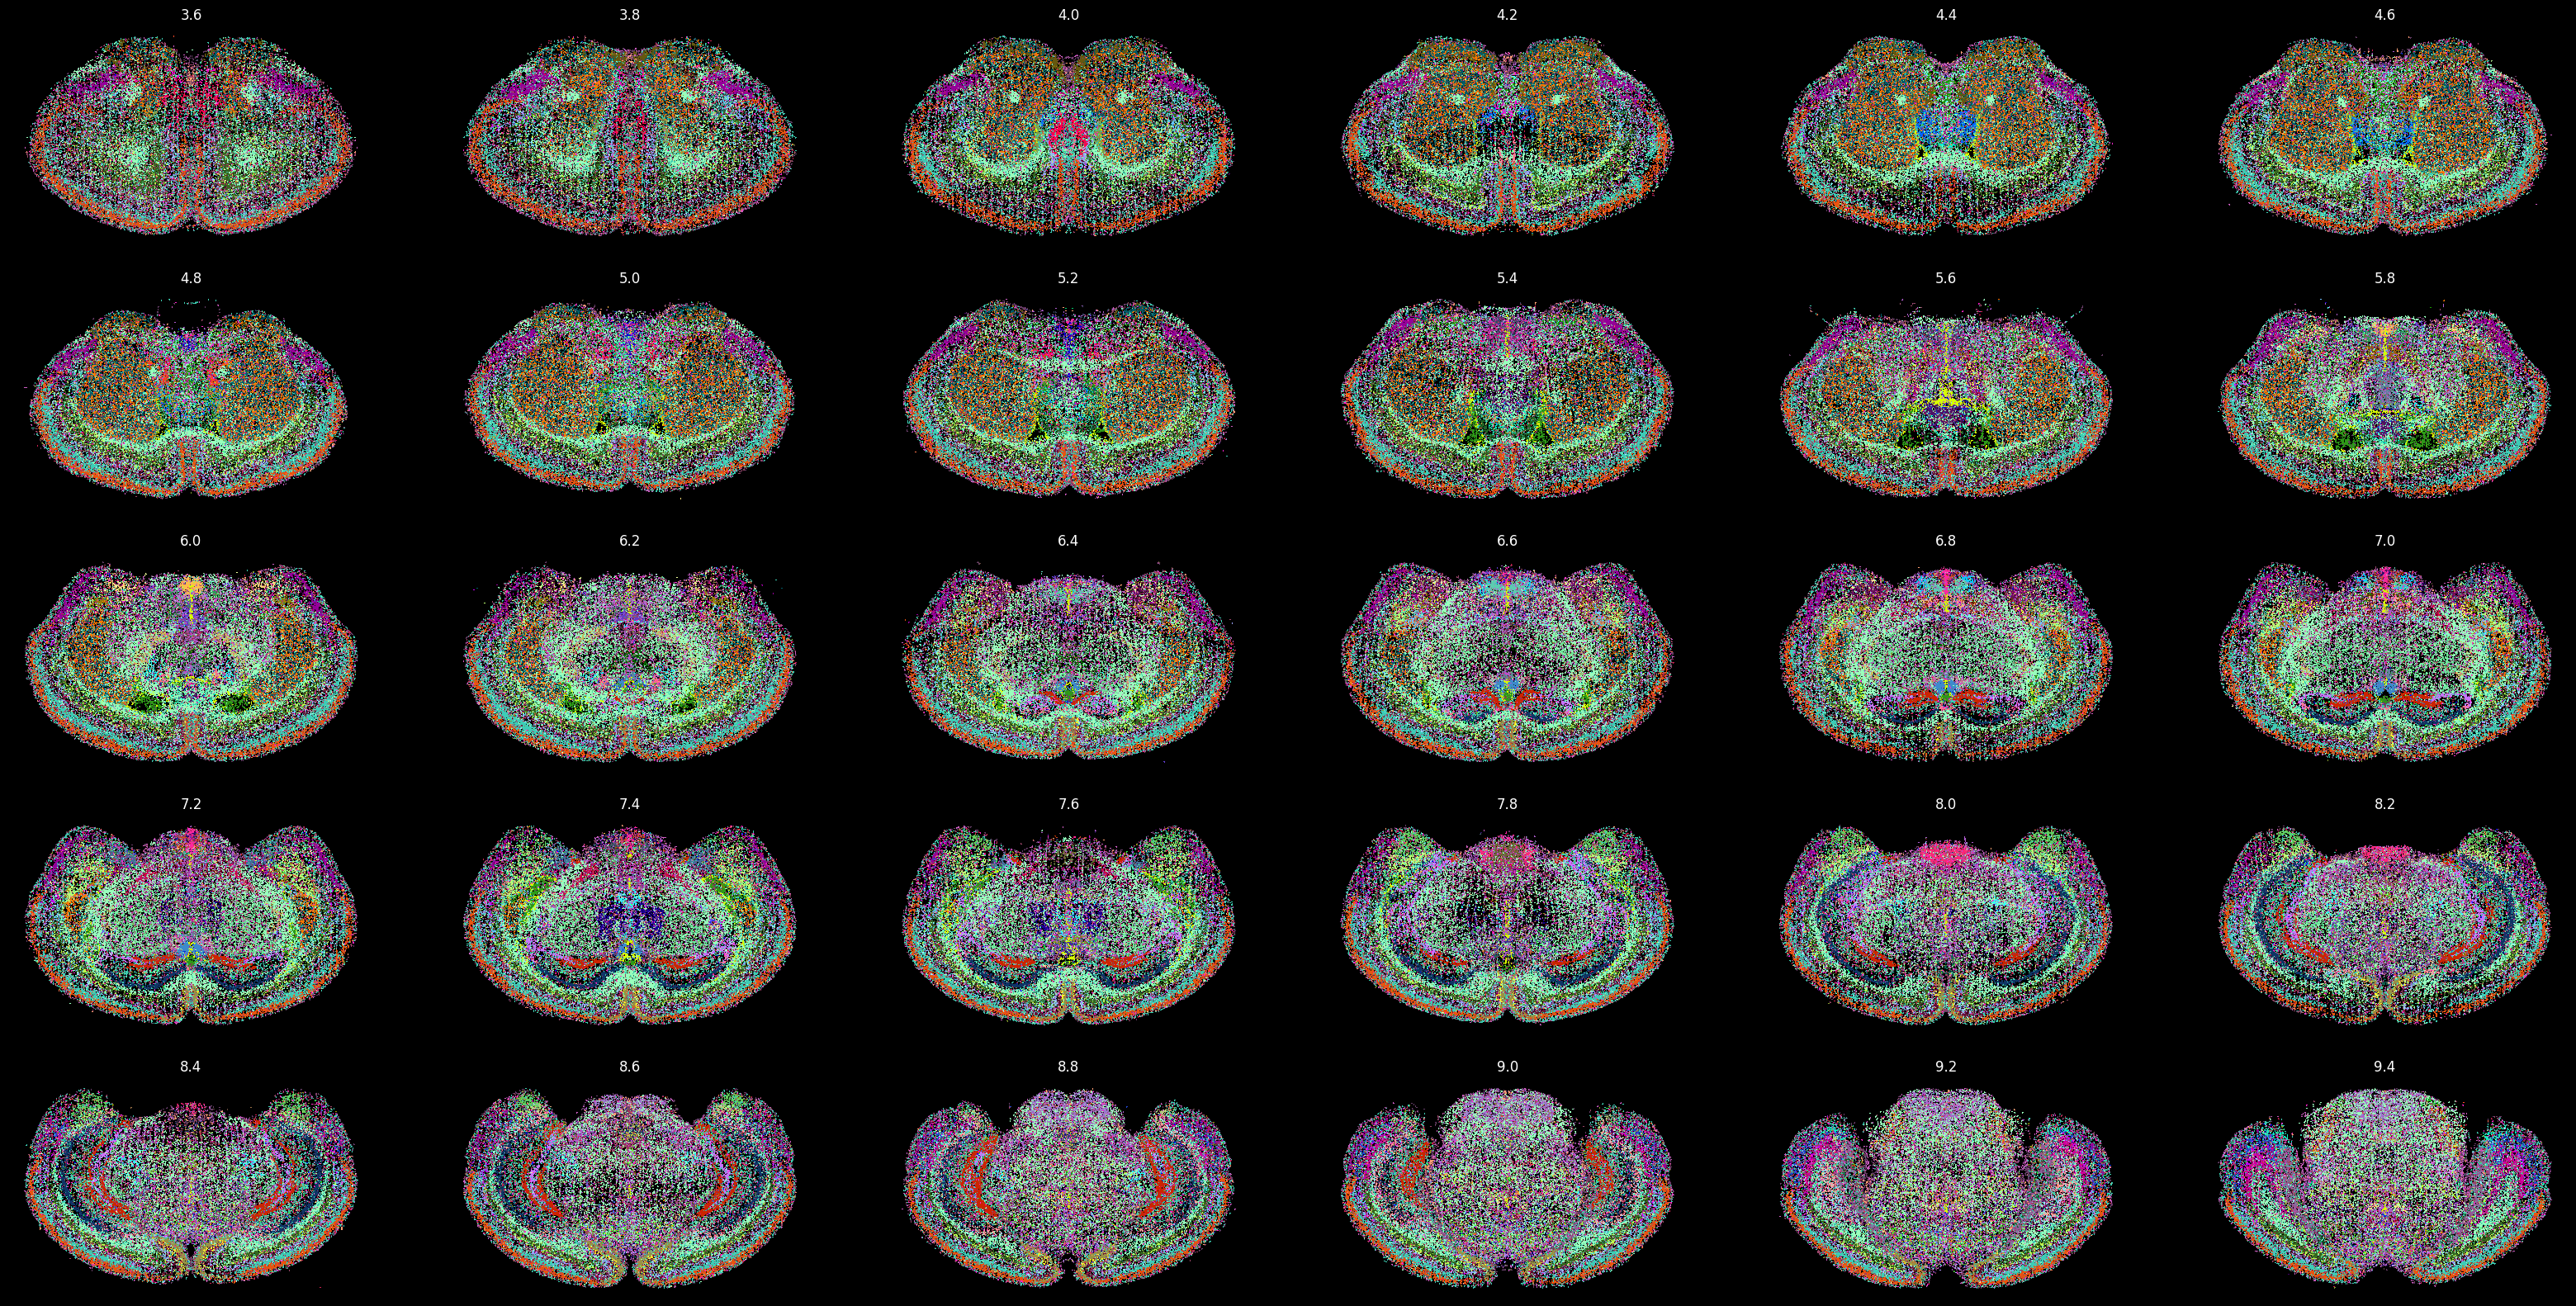

In [11]:
window = 0.1

fig,axs = plt.subplots(5,6,figsize=[40,20])
fig.patch.set_facecolor('black')  # Set figure background to black
plt.rcParams.update({'text.color' : "white"})  # Set text color to white

axs = axs.ravel()

start = 3.6
stop = 9.4
n = 5*6
for i,ccf_x in enumerate(np.linspace(start,stop,n)):
    sample = np.random.choice(reference_data[np.abs((reference_data['ccf_x']-ccf_x))<window].index,100000)
    ax = axs[i]
    ax.scatter(reference_data.loc[sample,'ccf_z'],reference_data.loc[sample,'ccf_y'],c=reference_data.loc[sample,'color'],s=0.1,marker='+')
    ax.set_title(round(ccf_x,2), color='white')
    ax.axis('off')
plt.savefig('/home/zach/PythonRepos/dredFISH/dredFISH/Registration/Reference.png')
plt.show()